In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [109]:
data = pd.read_csv('learningSet.csv')

sclicing the dataframe into categorical 

In [110]:
cats = data.select_dtypes(object)
cats.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,XXXX,T2,36,,,,,,,F,,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,XXXX,S1,14,E,H,,,,M,M,3,,,,2,,,,,,,,,,,,,,,,,,,,,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,,,,L1E,,,N1E,N1E,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,XXXX,R2,43,,U,,,,,M,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,,S4F,S4F,S4F,S4F,S4F,S4F,,S4D,S4D,,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,XXXX,R2,44,E,U,,,,,F,3,,,,,,,,,,,,,,,,,,,,,,,,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,XXXX,S2,16,E,H,,,,,F,3,,12,,,,,Y,Y,,,,Y,,,Y,,Y,,Y,,Y,,3,,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A


dealing with the columns gender and mailcode 

In [111]:
df_gender = pd.DataFrame(cats['GENDER'].value_counts()).reset_index()
df_gender.columns = ['GENDER', 'count']
df_gender

,GENDER,count
0,F,51277
1,M,39094
2,,2957
3,U,1715
4,J,365
5,C,2
6,A,2


In [112]:


other_genders = list(df_gender[df_gender['count'] < 2000]['GENDER'])   # threshold of 2000 for genders
#other_genders
def clean_gender(x):
    if x in other_genders:
        return 'other'
    else:
        return x
    
cats['GENDER'] = list(map(clean_gender, cats['GENDER']))
cats['GENDER'].value_counts()

F        51277
M        39094
          2957
other     2084
Name: GENDER, dtype: int64

In [113]:
cats['MAILCODE'] = cats['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

cats['GENDER'] = cats['GENDER'].fillna('F')
cats['GENDER'].value_counts()

F        51277
M        39094
          2957
other     2084
Name: GENDER, dtype: int64

fillinf the empty value by Nan in the all categorical dataframe

In [114]:
cats = cats.apply(lambda x: x.replace(" ", np.NaN))

In [115]:
cats

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,GENDER,DATASRCE,SOLP3,SOLIH,MAJOR,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,T2,36,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,S1,14,E,H,NaN,NaN,NaN,M,M,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L2G,A2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,A1E,NaN,NaN,NaN,L1E,NaN,NaN,N1E,N1E,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,AMH,NC,27017,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,R2,43,NaN,U,NaN,NaN,NaN,NaN,M,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4F,S4F,S4F,NaN,S4F,S4F,S4F,S4F,S4F,S4F,NaN,S4D,S4D,NaN,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,R2,44,E,U,NaN,NaN,NaN,NaN,F,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,NaN,S4E,S4E,S4E,S4E,S4E,S4E,S2D,S2D,A1D,A1D,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,NaN,FL,33176,A,NaN,0,X,X,NaN,NaN,XXXX,S2,16,E,H,NaN,NaN,NaN,NaN,F,3,NaN,12,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,Y,NaN,NaN,Y,NaN,Y,NaN,Y,NaN,Y,NaN,3,NaN,L2F,A2F,A2F,A2F,A1D,I2D,A1E,A1E,L1D,A1E,A1E,L1D,L3D,NaN,L3D,A2D,A2D,A3D,A3D,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,C2,27,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L1G,F1G,F1G,NaN,F1G,P1G,P1G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,G,X,X,X,C
95408,DCD,TX,77379,A,NaN,0,NaN,NaN,NaN,NaN,XXXX,C1,24,E,H,NaN,NaN,NaN,M,M,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L1F,NaN,NaN,NaN,NaN,P1F,P1F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,F,X,X,X,A
95409,MBC,MI,48910,A,NaN,0,NaN,X,NaN,NaN,XXXX,C3,30,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,L3E,S4E,S4E,S3E,S3E,NaN,A2E,N3E,N3E,N3E,N3E,N3E,N3E,N2E,F1D,NaN,F1D,NaN,NaN,P1D,P1D,NaN,NaN,L,E,X,X,X,B
95410,PRV,CA,91320,A,NaN,0,X,NaN,NaN,NaN,XXXX,C1,24,E,H,NaN,NaN,NaN,NaN,F,2,NaN,12,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,X,L4F,S4F,A3F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S3F,S2F,S2F,A1F,A1F,A1F,A1F,S2F,S3F,L,F,X,X,X,A


coputing the null values percentage

In [116]:
cats.isna().sum() * 100 /len(cats)   # Check for null values in all the categorical columns

OSOURCE      0.972624
STATE        0.000000
ZIP          0.000000
MAILCODE     0.000000
PVASTATE    98.471890
              ...    
RFA_2A       0.000000
MDMAUD_R     0.000000
MDMAUD_F     0.000000
MDMAUD_A     0.000000
GEOCODE2     0.334339
Length: 74, dtype: float64

creating a drop list tu be used later on

In [117]:
drop_list = ['OSOURCE', 'ZIP']

null values percentage into a dataframe

In [118]:
nulls_percent_df = pd.DataFrame(cats.isna().sum() * 100 /len(cats)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']


creating the threshold and the list of column to drop 

In [119]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage'] > 85 ]  
drop_columns_list = list(columns_above_threshold['column_name'])

appending the drop list with other columns

In [120]:
for i in drop_columns_list:
    drop_list.append(i)
print(drop_list)
len(drop_list)

['OSOURCE', 'ZIP', 'PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES']


31

dropping additionnal columns with the drop list created above

In [121]:
cats_clean = cats.drop(columns= drop_list)
# cats_clean

In [122]:
nums = data.select_dtypes(np.number)
nums.columns

Index(['ODATEDW', 'TCODE', 'DOB', 'AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'HIT',
       'MBCRAFT', 'MBGARDEN',
       ...
       'FISTDATE', 'NEXTDATE', 'TIMELAG', 'AVGGIFT', 'CONTROLN', 'TARGET_B',
       'TARGET_D', 'HPHONE_D', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=407)

Checking the null values in numerical

In [123]:
nums.isna().sum() * 100 / len(nums)

ODATEDW      0.000000
TCODE        0.000000
DOB          0.000000
AGE         24.802960
NUMCHLD     87.018404
              ...    
TARGET_B     0.000000
TARGET_D     0.000000
HPHONE_D     0.000000
RFA_2F       0.000000
CLUSTER2     0.138347
Length: 407, dtype: float64

In [124]:
df = pd.DataFrame(nums.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,NUMCHLD,83026
5,INCOME,21286
6,WEALTH1,44732
8,MBCRAFT,52854
...,...,...
386,RAMNT_23,87553
387,RAMNT_24,77674
398,NEXTDATE,9973
399,TIMELAG,9973


## dealing with GEOCODE2 as integer and not categorical

In [125]:
def geo_change(x):
    if x == 'A':
        return '1'
    elif x == 'B':
        return '2'
    elif x == 'C':
        return '3'
    else:
        return '4'

In [126]:
data['GEOCODE2'] = data['GEOCODE2'].apply(geo_change)
data['GEOCODE2'] = pd.to_numeric(data['GEOCODE2'])
data['GEOCODE2']

0        3
1        1
2        3
3        3
4        1
        ..
95407    3
95408    1
95409    2
95410    1
95411    3
Name: GEOCODE2, Length: 95412, dtype: int64

In [127]:
data['GEOCODE2'].value_counts(dropna= False)

1    34484
2    28505
4    16899
3    15524
Name: GEOCODE2, dtype: int64

In [129]:
data['GEOCODE2'].isna().sum()   #no nul values here

0

In the end, as GEOCODE 2 is the informations about the country size, and we already have the ZIP code, i don't think it is relevant to keep that column for our model.

## dealing with WEALTH1

In [131]:
nums['WEALTH1'].value_counts(dropna= False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

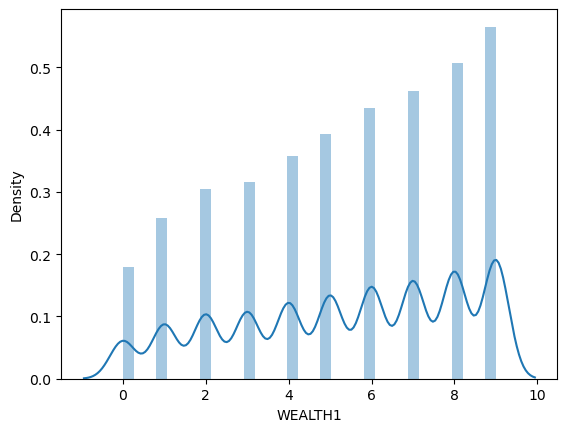

In [132]:
sns.distplot(nums[nums['WEALTH1'].isna() == False]['WEALTH1'], kde = True)
plt.show()

In [134]:
np.ceil(np.mean(nums['WEALTH1']))

nan

In [135]:
nums['WEALTH1'] = nums['WEALTH1'].fillna(np.ceil(np.mean(nums['WEALTH1'])))   # replacing the Nan by the mean
nums['WEALTH1'] = nums['WEALTH1'].astype(object)   # converting that column into a category not a nums 

As we have information about income (as categorical) we don't need another category for our analysis. We will drop that column before the model building.

## dealing with ADI

In [137]:
print(nums['ADI'].value_counts(dropna =False))
nums["ADI"].isna().sum()

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64


132

132 nan values. 

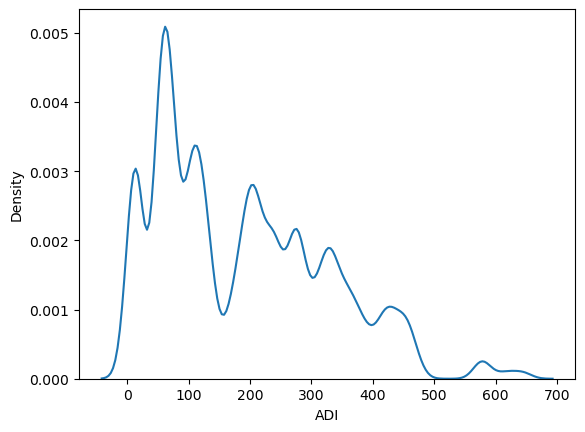

In [142]:
sns.kdeplot(nums[nums['ADI'].isna() == False]['ADI'])
plt.show()

Boxing outliers

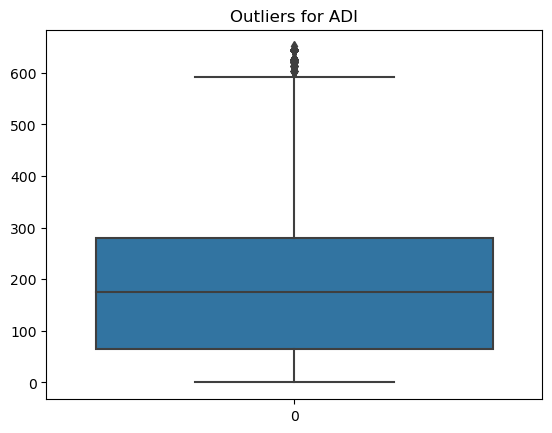

In [140]:
sns.boxplot(data = nums['ADI'])
plt.title('Outliers for ADI')
plt.show()

Here as we don't know what is the column is about, we decide to keep it as it is and not dropping anny values.

Some informations could be lost in rows if we decide to drop, best to wait for the client to explain that column before any action.

## dealing with DMA

In [143]:
print(nums['DMA'].value_counts(dropna= False))
nums['DMA'].isna().sum()

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64


132

again 132 nan values

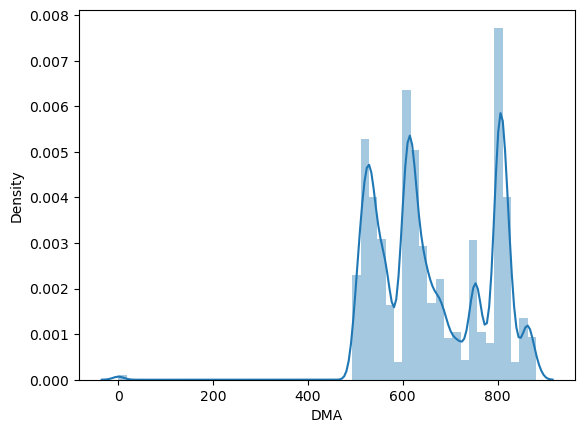

In [144]:
sns.distplot(nums[nums['DMA'].isna() == False]['DMA'], kde = True)
plt.show()

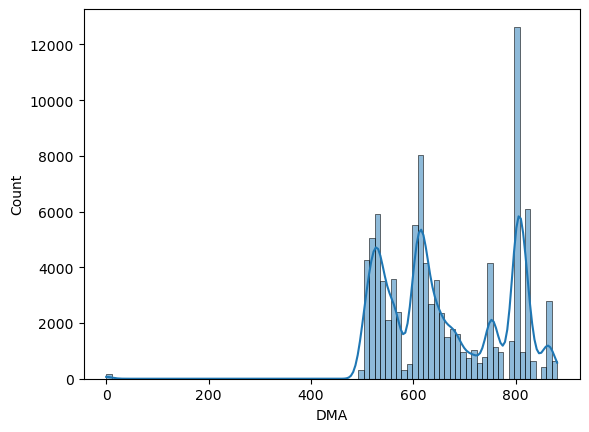

In [145]:
sns.histplot(nums[nums['DMA'].isna() == False]['DMA'], kde = True)
plt.show()

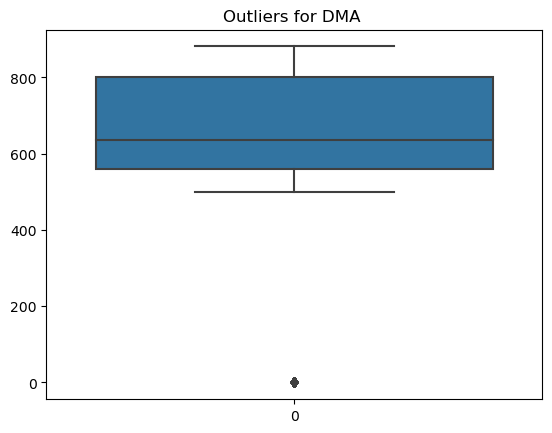

In [147]:
sns.boxplot(data = nums['DMA'])
plt.title('Outliers for DMA ')
plt.show()

some minor outliers around 0

## dealing with MSA

In [148]:
print(nums['MSA'].value_counts(dropna =False))
nums['MSA'].isna().sum()

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64


132

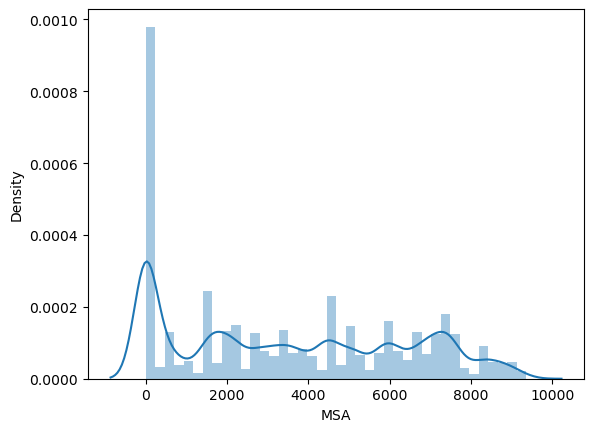

In [149]:
sns.distplot(nums[nums['MSA'].isna() == False]['MSA'], kde = True)
plt.show()

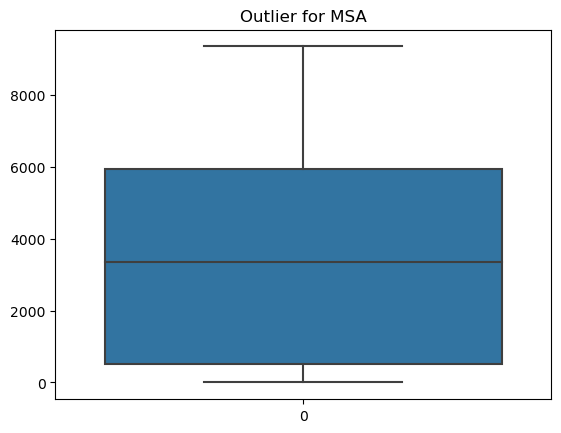

In [150]:
sns.boxplot(data = nums['MSA'])
plt.title('Outlier for MSA')
plt.show()

## we can see from the value counts of ADI, DMA, and MSA, thaht all have 132 missing values, to address this , i think we will drop those columns before building our model; 

but it is best to check with the client first before any rush drops !